In [361]:
import numpy as np

In [362]:
import matplotlib.pyplot as plt

In [363]:
x = np.arange(100)
y = np.arange(100)
xy = np.meshgrid(x, y)
xy = np.stack(xy, axis=-1)

In [364]:
xy.shape

(100, 100, 2)

In [450]:
# vertices = np.array([[20, 60], [55, 20], [80, 45], [55, 35]])


# vertices = np.array([[80, 45], [20, 60], [55, 20], [55, 70]])
vertices = np.array([[20, 60], [55, 20], [80, 35], [95, 35], [55, 70]])

In [451]:
img = np.zeros((100, 100))
img[vertices[:, 1], vertices[:, 0]]= 1

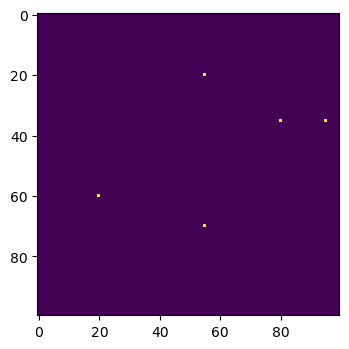

In [452]:
fig = plt.figure(dpi=100)
plt.imshow(img)

In [453]:
pos_mean = vertices.mean(axis=0, keepdims=True)

In [454]:
pos_mean

array([[61., 44.]])

In [455]:
directions = vertices - pos_mean

In [456]:
directions

array([[-41.,  16.],
       [ -6., -24.],
       [ 19.,  -9.],
       [ 34.,  -9.],
       [ -6.,  26.]])

In [457]:
a = []
b = []
for i in range(4):
    for j in range(4):
        if i != j:
            a.append(i)
            b.append(j)

In [458]:
a = [0,1,2,3,4]

In [459]:
b = [1,2,3,4,0]

In [460]:
cross_ref = directions[a] * directions[b, ::-1] * np.array([[1, -1.]])

In [461]:
cross_ref

array([[ 984.,   96.],
       [  54.,  456.],
       [-171.,  306.],
       [ 884.,  -54.],
       [ -96., 1066.]])

In [462]:
cross_ref = cross_ref.sum(axis=-1)

In [463]:
cross_ref

array([1080.,  510.,  135.,  830.,  970.])

In [464]:
score = xy - vertices[:, None, None, :]

In [465]:
score.shape

(5, 100, 100, 2)

In [466]:
xy.shape

(100, 100, 2)

In [467]:
score = vertices[:, None, None, :] - xy
score = score[a] * score[b, :, :, ::-1] * np.array([1, -1])
# score = 1/(1+ np.exp(np.sign(score.sum(axis=-1)).sum(0)*-5))
score = (np.sign(score.sum(axis=-1)) * np.sign(cross_ref[:, None, None])).sum(0)


In [468]:
score

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [3., 3., 3., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.]])

In [469]:
score.max()

5.0

In [470]:
score.min()

-1.0

In [471]:
score_exp = np.exp(score)
score_exp = (score_exp - score_exp.min()) / (score_exp.max() - score_exp.min())

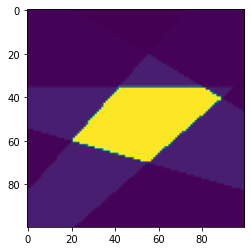

In [472]:
plt.imshow(np.exp(score_exp))